In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Introduction:

Spotify is a music streaming service that has millions of users a day. I want to increase song sales for my current company. Below is the top 100 songs streamed in the year 2017 on spotify. Below I try to find and identify patterns that the top songs have. The average duration of a song is 210000ms and the average tempo is around 115bpm according to the rolling stone. I am looking at three main components of the top 100 songs. Duration, tempo, and danceability. Danceability is a metric that describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

In [16]:
# Spotify data set that contains top 100 songs

df = pd.read_csv("/Users/elijahwoolford/Desktop/python /featuresdf_2.csv",encoding="ISO-8859-1")
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713,4
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2,-4.328,1,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827,4
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2,-4.757,1,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200,4
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11,-6.769,0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160,4
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7,-4.284,1,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600,4


In [5]:
df.mean()

danceability             0.696820
energy                   0.660690
key                      5.570000
loudness                -5.652650
mode                     0.580000
speechiness              0.103969
acousticness             0.166306
instrumentalness         0.004796
liveness                 0.150607
valence                  0.517049
tempo                  119.202460
duration_ms         218387.280000
time_signature           3.990000
dtype: float64

In [6]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00


Text(0.5,1,'Tempo Range')

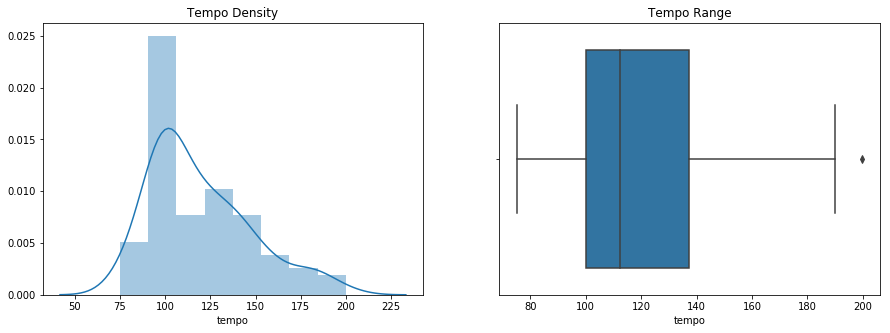

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
x = sns.distplot(df["tempo"])
plt.title("Tempo Density")

plt.subplot(1,2,2) 
sns.boxplot(df["tempo"])
plt.title("Tempo Range")

These plots show that a good portion of the songs in the top 100 have tempos around 100-140bpm. 

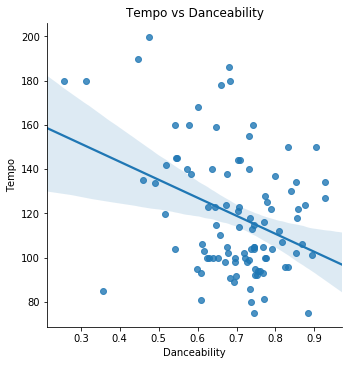

In [8]:
g = sns.lmplot(y="tempo", x="danceability", data=df, fit_reg=True)
g.set_ylabels("Tempo")
g.set_xlabels("Danceability")
plt.title('Tempo vs Danceability')
plt.show()

The above plot shows that lower more moderate tempo songs tend to have higher danceability than higher tempo ones. 

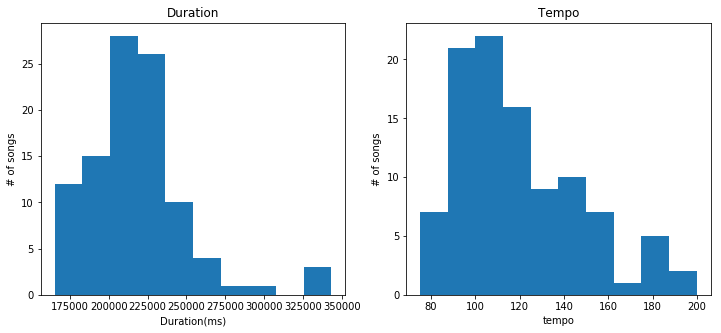

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df["duration_ms"])
plt.xlabel("Duration(ms)")
plt.ylabel("# of songs")
plt.title("Duration")

plt.subplot(1,2,2)
plt.hist(df["tempo"])
plt.xlabel("tempo")
plt.ylabel("# of songs")
plt.title("Tempo")


plt.show()

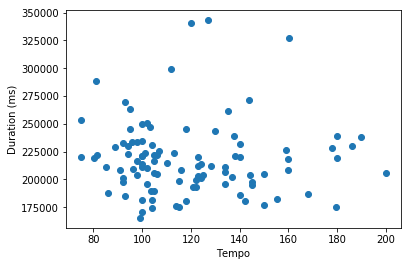

In [15]:
plt.scatter(x=df["tempo"], y=df["duration_ms"])
plt.xlabel("Tempo")
plt.ylabel("Duration (ms)")
plt.show()

Interestingly, most of the songs in the top 100 have shorter durations

# Research Proposal:

**The question:** Can we sell more songs if we offer shorter and more moderate tempo songs?

**Proposed Hypothesis:** I believe that putting out more short, moderate tempo songs will increase sales than the current listing of songs. 

**Method of testing:** Gather 1000 random songs that fit the creiteria for analysis. The control group would be the above data set of 100 songs since they are the most streamed and are what we're aiming for. The experimental group would be the random 1000 songs. We would market for three months the experiemental group to see if any difference in sales will occur.  A successful test would include an increase sales for our company. Potential issues may occur if we don't continue to update our experimental group. Songs are constantly being released weekly, so keeping an up to date listing is vital. Also, a key metric not revealed above is genre. The top 100 songs above are very diverse in the type of genres they offer so we have to be certain that we have a good mix of popular genres.  